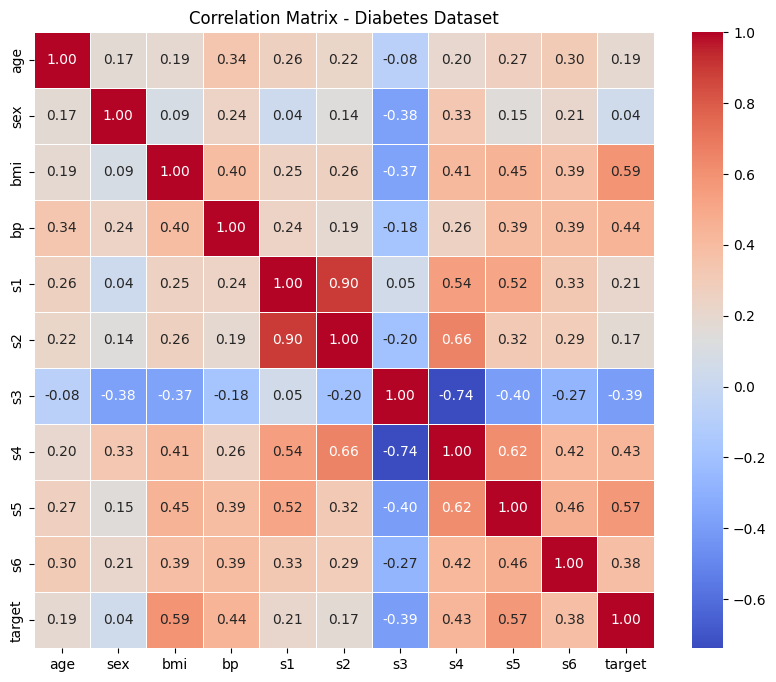

LinearRegression: mean of r2 scores=0.482
LinearRegression: Mean Squared Error=2900.194, R-squared=0.453


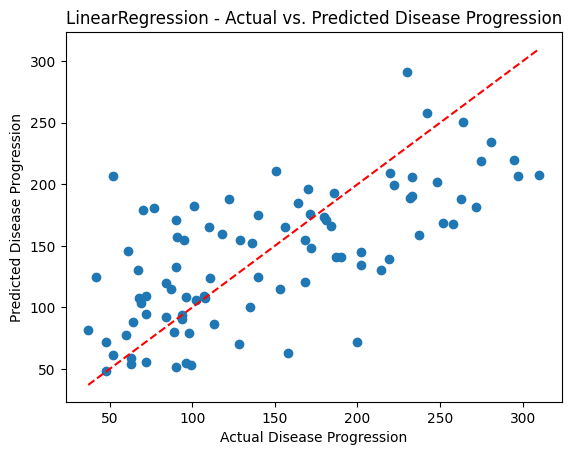

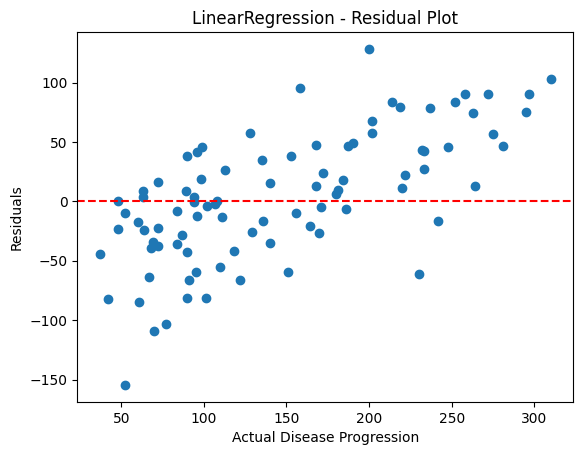

      ElasticNet: mean of r2 scores=-0.005
      ElasticNet: Mean Squared Error=5311.213, R-squared=-0.002


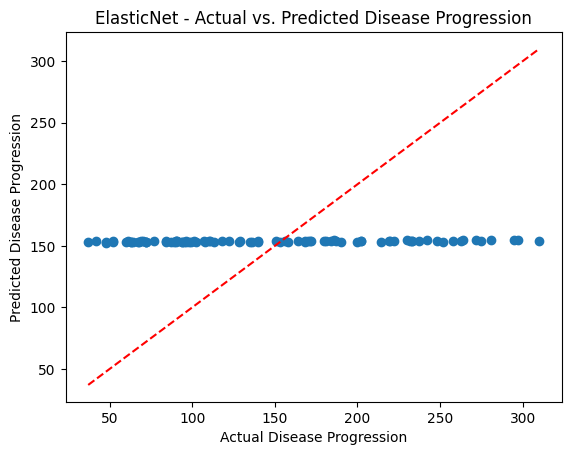

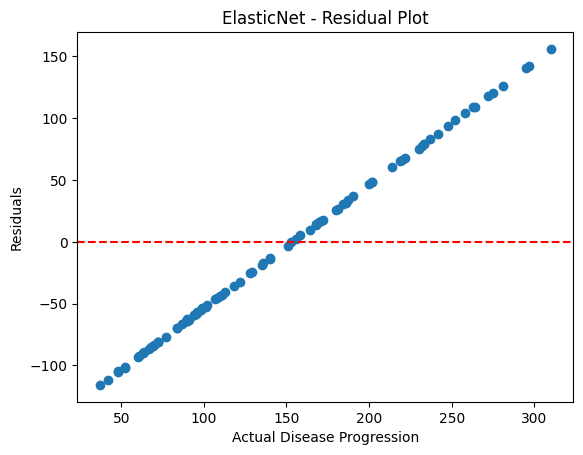

           Lasso: mean of r2 scores=0.340
           Lasso: Mean Squared Error=3403.576, R-squared=0.358


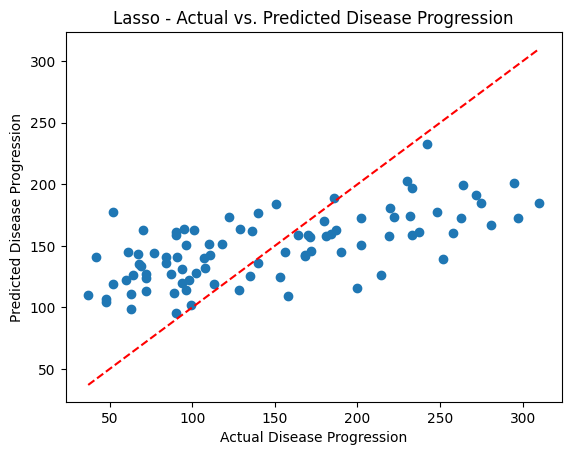

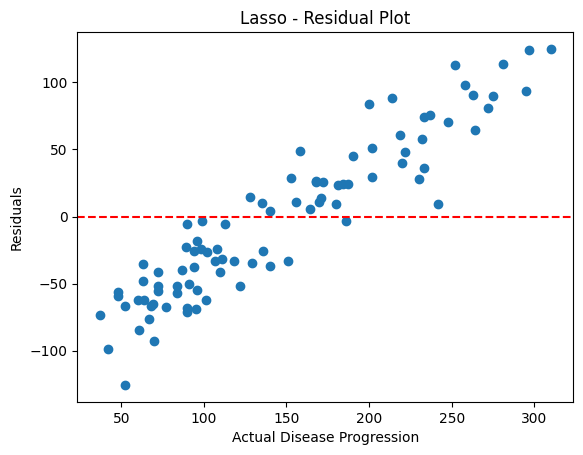

           Ridge: mean of r2 scores=0.410
           Ridge: Mean Squared Error=3077.416, R-squared=0.419


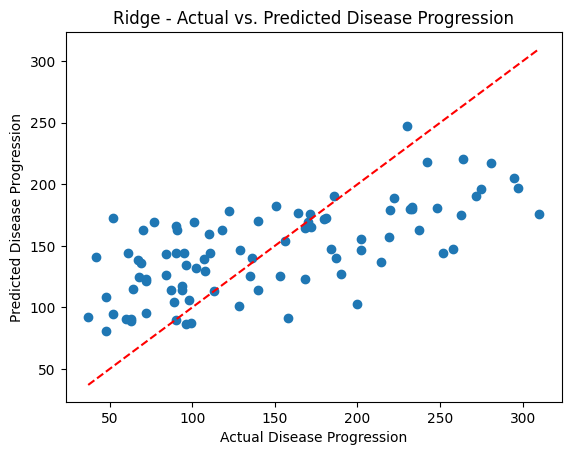

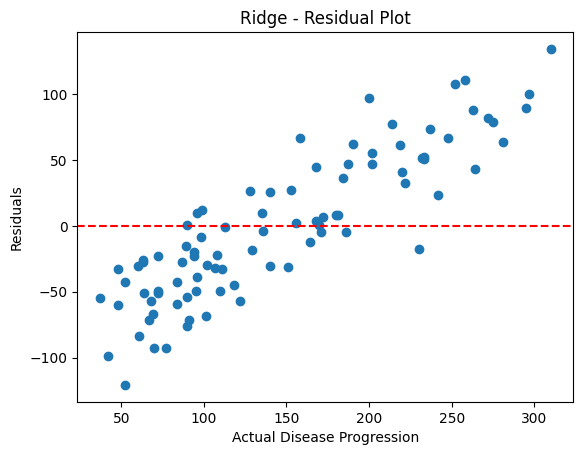

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = datasets.load_diabetes()
df_diabetes = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

correlation_matrix_diabetes = df_diabetes.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_diabetes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Diabetes Dataset")
plt.show()

X = df_diabetes.drop('target', axis=1)
y = df_diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}


for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X_train, y=y_train, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')


    estimator_object.fit(X_train, y_train)
    y_pred = estimator_object.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{estimator_name:>16}: ' + f'Mean Squared Error={mse:.3f}, R-squared={r2:.3f}')

    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual Disease Progression")
    plt.ylabel("Predicted Disease Progression")
    plt.title(f"{estimator_name} - Actual vs. Predicted Disease Progression")
    plt.show()

    residuals = y_test - y_pred
    plt.scatter(y_test, residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Actual Disease Progression")
    plt.ylabel("Residuals")
    plt.title(f"{estimator_name} - Residual Plot")
    plt.show()
